<h1>3 &nbsp; Métodos numéricos - Euler, Euler modificado e RK4 </h1>
<h2>3.1 &nbsp; O método de Euler</h2>

 &nbsp; Importando as bibliotecas NumPy e Matplotlib ao arquivo <b>atual</b>:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 &nbsp; Carregando o diretório <b>python/</b> que contém as funções escritas ao longo dos tópicos:

In [2]:
import sys
sys.path.insert(0, '../python')

 Escrevendo arquivo contendo a função <b>f(&LT;população>)</b> contendo o modelo matemático do fenômeno

In [3]:
%%writefile ../python/f_malthus.py
def f_malthus(P):
    return 0.0056*P

Overwriting ../python/f_malthus.py


  Importando a função <b>sol_euler</b> escrita em <b>[4]</b>:

In [4]:
from sol_euler import sol_euler

&nbsp; Uma vez definido o método de Euler, basta declarar o passo de derivação <b>h</b>, a condição inicial <b>T0</b>, o tempo inicial <b>ti</b>, o tempo final <b>tf</b> e o intervalo de tempo <b>vt</b>:

In [5]:
#Passo de derivação
h = 0.001

#Condição inicial
P0 = 186488

#tempo inicial
ti = 0

#tempo final
tf = 21

#Intervalo de 10 à 21 anos com passo h
vt = np.arange(ti,tf,h)

&nbsp; Atribuindo as variáveis aos parâmetros de <b>sol_euler</b>:

In [6]:
P = sol_euler(vt,P0,'malthus')
print(P)
print('O vetor de temperaturas tem {} elementos'.format(P.shape[0]))

[186488.         186489.0443328  186490.08867145 ... 209757.00980926
 209758.18444852 209759.35909435]
O vetor de temperaturas tem 21000 elementos


  Exibindo o gráfico <b>vt</b> $\times$ <b>T</b>:

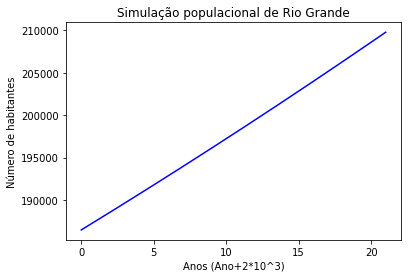

In [7]:
plt.plot(vt,P,'b',label='Euler')
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

<h3>3.1.1 &nbsp; Estudo comparativo - Diferentes passos de derivação</h3>

&nbsp; Construímos um vetor <b>passos</b> contendo os passos de derivação. &nbsp;  Além disso, é importante para o estudo comparativo que as curvas possuam cores distintas. &nbsp; Também construímos um vetor de <b>cores</b>.

In [8]:
passos = np.array([5,3,1,0.001])
cores = np.array(['m','c','r','k','g','b'])
print(' |passos| = {} , |cores| = {}'.format(passos.shape[0],cores.shape[0]))

 |passos| = 4 , |cores| = 6


  Dessa forma, escrevemos um <i>loop</i> para percorrer os elementos de passos e assim gerar diferentes soluções através da função <b>sol_euler</b>:

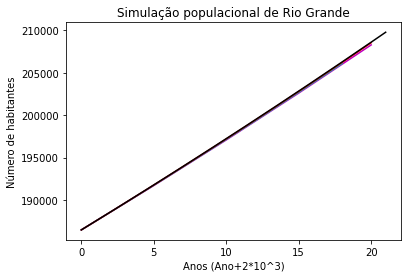

In [9]:
#Criando loop que percorre os elementos de passos
for passo in passos:
   
    #Criando vetor tempo
    vt = np.arange(ti,tf,passo)

    #Chamando a função sol_euler 
    P = sol_euler(vt,P0,'malthus')
    
    #Grafico da curva    
    plt.plot(vt,P,'{}'.format(cores[np.where(passos==passo)[0][0]]),label='h = {}'.format(passo))


#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

&nbsp; Importando a função erro:

In [10]:
from f_erro import f_erro

&nbsp; Neste momento, escrevemos um algoritmo similar ao <b>input [10]</b>, mas, ao invés de exibir o gráfico para diferentes passos de derivação, exibiremos o erro para estes passos.

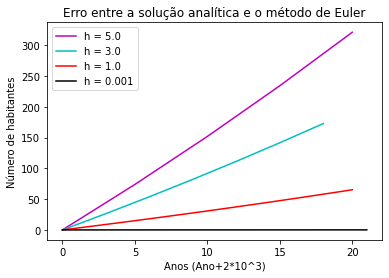

[186488.         186489.0443328  186490.08867145 ... 209757.00980926
 209758.18444852 209759.35909435]
[186488.         186489.04433572 186490.0886773  ... 209757.07886793
 209758.25351087 209759.42816037]
(21000,)


In [11]:
#Criando loop para diferentes passos de derivação
for passo in passos:
   
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Chamando a função sol_euler 
    P = sol_euler(vt,P0,'malthus')
    
    #Gerando solução analítica
    sol_analitica = 186488*np.exp(0.0056*vt)
    
    #Chamando a função erro
    err = f_erro(sol_analitica,P)
    
    #Grafico da curva    
    plt.plot(vt,err,'{}'.format(cores[np.where(passos==passo)[0][0]]),label='h = {}'.format(passo))
    
#Exibindo figura
plt.title("Erro entre a solução analítica e o método de Euler")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.legend()
plt.show()

print(P)
print(sol_analitica)
print(P.shape)

&nbsp; Nota-se que a medida em que o passo de derivação diminui, o erro entre a solução numérica e analítica também diminui.   Desta forma, concluímos que para obter uma solução numérica aceitável pelo método de Euler, devemos tomar um passo de derivação próximo de 0. Vale salientar que para todos os passos de derivação utilizados, a solução analítica é maior que a solução numérica.